* TTest is used to :
    - Check significance of a `feature (X)` towards `Target Column (Y)`
    - Check how good a predictor the feature is
---
* Involves a 2-step process :
    - Distribution check
    - ttest_ind ... (parametric test for normal dist) ............ MWNU ... (non-parametric test for non-normal dist)  
---
* From a pairplot , we can decide which feature to be micro-viewed wrt Target_Column predictor nature

# **Table of Contents**
* [Dataset 1 : Diabetes](#hello)
* [Dataset 2 : Cancer](#hi)


In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

import scipy.stats       as stats

import warnings
warnings.simplefilter("ignore")

<a id='hello'></a>
# **Dataset 1**

In [2]:
df  =  pd.read_csv("datasets/diabetes.csv")

df.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
12,10,139,80,0,0,27.1,1.441,57,0
746,1,147,94,41,0,49.3,0.358,27,1
191,9,123,70,44,94,33.1,0.374,40,0


**Target Col -- Outcome**

## **Feature - Glucose**

In [3]:
GD    =  df  [df['Outcome']==1]  ['Glucose']             
GND   =  df  [df['Outcome']==0]  ['Glucose']     

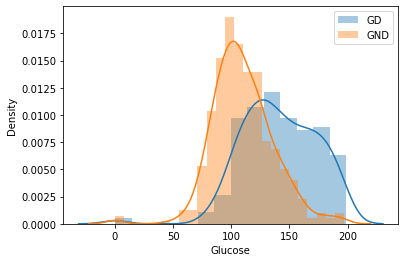

In [4]:
sns.distplot  (GD  , label='GD')
sns.distplot  (GND , label='GND')

plt.legend()

In [5]:
stats.mannwhitneyu  (GD, GND)

MannwhitneyuResult(statistic=28390.5, pvalue=6.0036342099385686e-40)

> Comments
    
        * p < alpha
        * reject null
        * Sig difference between GD & GND
        * Hence , Glucose is a good predictor

<a id='hi'></a>
# **Dataset 2**

In [6]:
df  =  pd.read_csv ("datasets/Cancer.csv")

df.sample(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
314,856106,M,13.28,20.28,87.32,545.2,0.10410,0.14360,0.09847,0.06158,...,17.38,28.0,113.10,907.2,0.1530,0.3724,0.3664,0.14920,0.3739,0.10270
78,89382602,B,12.76,13.37,82.29,504.1,0.08794,0.07948,0.04052,0.02548,...,14.19,16.4,92.04,618.8,0.1194,0.2208,0.1769,0.08411,0.2564,0.08253
211,857793,M,14.71,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,...,17.87,30.7,115.70,985.5,0.1368,0.4290,0.3587,0.18340,0.3698,0.10940


**Target Col -- Diagnosis**

## **Feature - radius_mean**

In [7]:
RB  =  df  [df['diagnosis']=='B']  ['radius_mean']
RM  =  df  [df['diagnosis']=='M']  ['radius_mean']

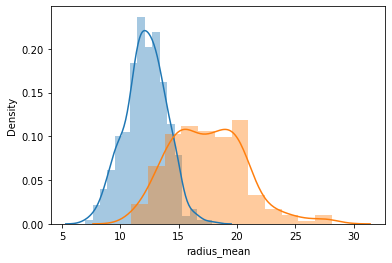

In [8]:
sns.distplot (RB)
sns.distplot (RM)

In [9]:
stats.mannwhitneyu (RB , RM)

MannwhitneyuResult(statistic=4729.0, pvalue=1.3464713863982824e-68)

> Comments
    
        * p < alpha
        * reject null
        * Sig difference between RB & RM
        * Hence , Radius_Mean is a good predictor

## **Feature - texture_se**

In [10]:
TB  =  df  [df['diagnosis']=='B']  ['texture_se']
TM  =  df  [df['diagnosis']=='M']  ['texture_se']

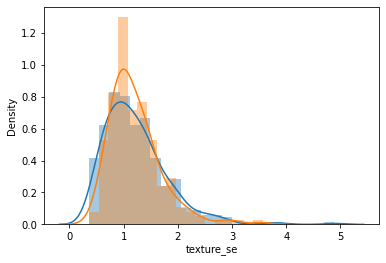

In [11]:
sns.distplot (TB)
sns.distplot (TM)

In [12]:
stats.ttest_ind (TB , TM)

Ttest_indResult(statistic=0.1977238031013334, pvalue=0.8433320287670163)

> Comments
    
        * p > alpha
        * accept null
        * NO sig difference between TB & TM
        * Hence , Texture_se is a bad predictor